In [104]:
#####################################################################################################################
#   Name: Nikita Istomin
#   Date: 03/20/2023
#   Assignment 2: Neural Network Analysis
#   This is a code in Python 3.6 for a neural network.
#   You need to have numpy and pandas installed before running this code.

#####################################################################################################################

In [105]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [106]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [107]:
class NeuralNet:
  def __init__(self, dataFile, header=True):
    self.raw_input = pd.read_csv(dataFile)
    self.processed_data = self.raw_input


  def describe_dataset(self):
    return self.processed_data.describe().transpose()

  # TODO: Write code for pre-processing the dataset, which would include
  # standardization, normalization,
  #   categorical to numerical, etc
  def preprocess(self):
    # drop the day, month, and year columns
    self.processed_data = self.raw_input.drop(['day', 'month', 'year'], axis=1)
    # drop all rows with missing values
    self.processed_data = self.processed_data.dropna(axis=0)
    # fix the column names
    self.processed_data = self.processed_data.rename(columns = {'Classes  ': 'Label'})
    # remove the spaces from the label column
    self.processed_data['Label'] = self.processed_data['Label'].str.strip()
    # replace the label column with numerical values
    self.processed_data = self.processed_data.replace({'not fire': -1, 'fire': 1})

    # convert some data types to float
    self.processed_data['FWI'] = self.processed_data['FWI'].astype(float)
    self.processed_data['DC'] = self.processed_data['DC'].astype(float)
    
    # Scale the data
    scaler = StandardScaler()
    X = self.processed_data.iloc[:, :-1]
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    self.processed_data = self.processed_data.reset_index(drop=True)
    self.processed_data = pd.concat([X, self.processed_data['Label']], axis=1)
    

    return self.processed_data

  # TODO: Train and evaluate models for all combinations of parameters
  # specified in the init method. We would like to obtain following outputs:
  #   1. Training Accuracy and Error (Loss) for every model
  #   2. Test Accuracy and Error (Loss) for every model
  #   3. History Curve (Plot of Accuracy against training steps) for all
  #       the models in a single plot. The plot should be color coded i.e.
  #       different color for each model

  def train_evaluate(self):
    ncols = len(self.processed_data.columns)
    nrows = len(self.processed_data.index)
    X = self.processed_data.iloc[:, 0:(ncols - 1)]
    y = self.processed_data.iloc[:, (ncols-1)]
    X_train, X_test, y_train, y_test = train_test_split(
      X, y)

    # Below are the hyperparameters that you need to use for model
    #   evaluation
    activations = ['logistic', 'tanh', 'relu']
    learning_rate = [0.01, 0.1]
    max_iterations = [100, 200] # also known as epochs
    num_hidden_layers = [2, 3]

    # Create the neural network and be sure to keep track of the performance
    #   metrics
    outputs = []
    results = []
    for activation in activations:
      for nh in num_hidden_layers:
        for lr in learning_rate:
          for mi in max_iterations:
            mlp = MLPClassifier(hidden_layer_sizes=(nh,), activation=activation, learning_rate_init=lr, max_iter=mi)
            train_acc, train_loss,  = [], []
            for epoch in range(1, mlp.max_iter + 1):
                mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
                train_acc.append(mlp.score(X_train, y_train))
                train_loss.append(mlp.loss_)
            output = {'model': mlp, 'train_acc': train_acc, 'train_loss': train_loss}
            outputs.append(output)
            print(f"Model: {len(outputs)} Activation: {activation} Learning Rate: {str(lr)} Max Iterations: {str(mi)} Number of Hidden Layers: {str(nh)}")
            #Output a table of results containing following columns: model hyper-parameters, training and test accuracies, and training and test errors(e.g. mean squared error)
            Y_pred_train = mlp.predict(X_train)
            Y_pred_test = mlp.predict(X_test)
            mse_train = mean_squared_error(y_train, Y_pred_train)
            mse_test = mean_squared_error(y_test, Y_pred_test)
            acc_train = mlp.score(X_train, y_train)
            acc_test = mlp.score(X_test, y_test)
            results.append([activation, lr, mi, nh, acc_train, acc_test, mse_train, mse_test])

    # Plot the model history for each model in a single plot
    # model history is a plot of accuracy vs number of epochs
    # you may want to create a large sized plot to show multiple lines
    # in a same figure
    numOfPlots = 3
    fig = plt.figure(figsize=(30,20*numOfPlots))
    fig.suptitle('Model accuracy', fontsize=30)
    plt.rcParams.update({'font.size': 22})

    for i, output in enumerate(outputs):
      plt.subplot(numOfPlots, 1, int(i // (len(outputs) / numOfPlots)) + 1)
      train_acc = output['train_acc']
      plt.plot(train_acc, label='Training accuracy ' + str(i+1))
      plt.ylabel('Accuracy')
      plt.xlabel('Epoch')
      plt.legend(loc='lower right')
    plt.show()

    return outputs, results





Model: 1 Activation: logistic Learning Rate: 0.01 Max Iterations: 100 Number of Hidden Layers: 2
Model: 2 Activation: logistic Learning Rate: 0.01 Max Iterations: 200 Number of Hidden Layers: 2
Model: 3 Activation: logistic Learning Rate: 0.1 Max Iterations: 100 Number of Hidden Layers: 2
Model: 4 Activation: logistic Learning Rate: 0.1 Max Iterations: 200 Number of Hidden Layers: 2
Model: 5 Activation: logistic Learning Rate: 0.01 Max Iterations: 100 Number of Hidden Layers: 3
Model: 6 Activation: logistic Learning Rate: 0.01 Max Iterations: 200 Number of Hidden Layers: 3
Model: 7 Activation: logistic Learning Rate: 0.1 Max Iterations: 100 Number of Hidden Layers: 3
Model: 8 Activation: logistic Learning Rate: 0.1 Max Iterations: 200 Number of Hidden Layers: 3
Model: 9 Activation: tanh Learning Rate: 0.01 Max Iterations: 100 Number of Hidden Layers: 2
Model: 10 Activation: tanh Learning Rate: 0.01 Max Iterations: 200 Number of Hidden Layers: 2
Model: 11 Activation: tanh Learning Rate:

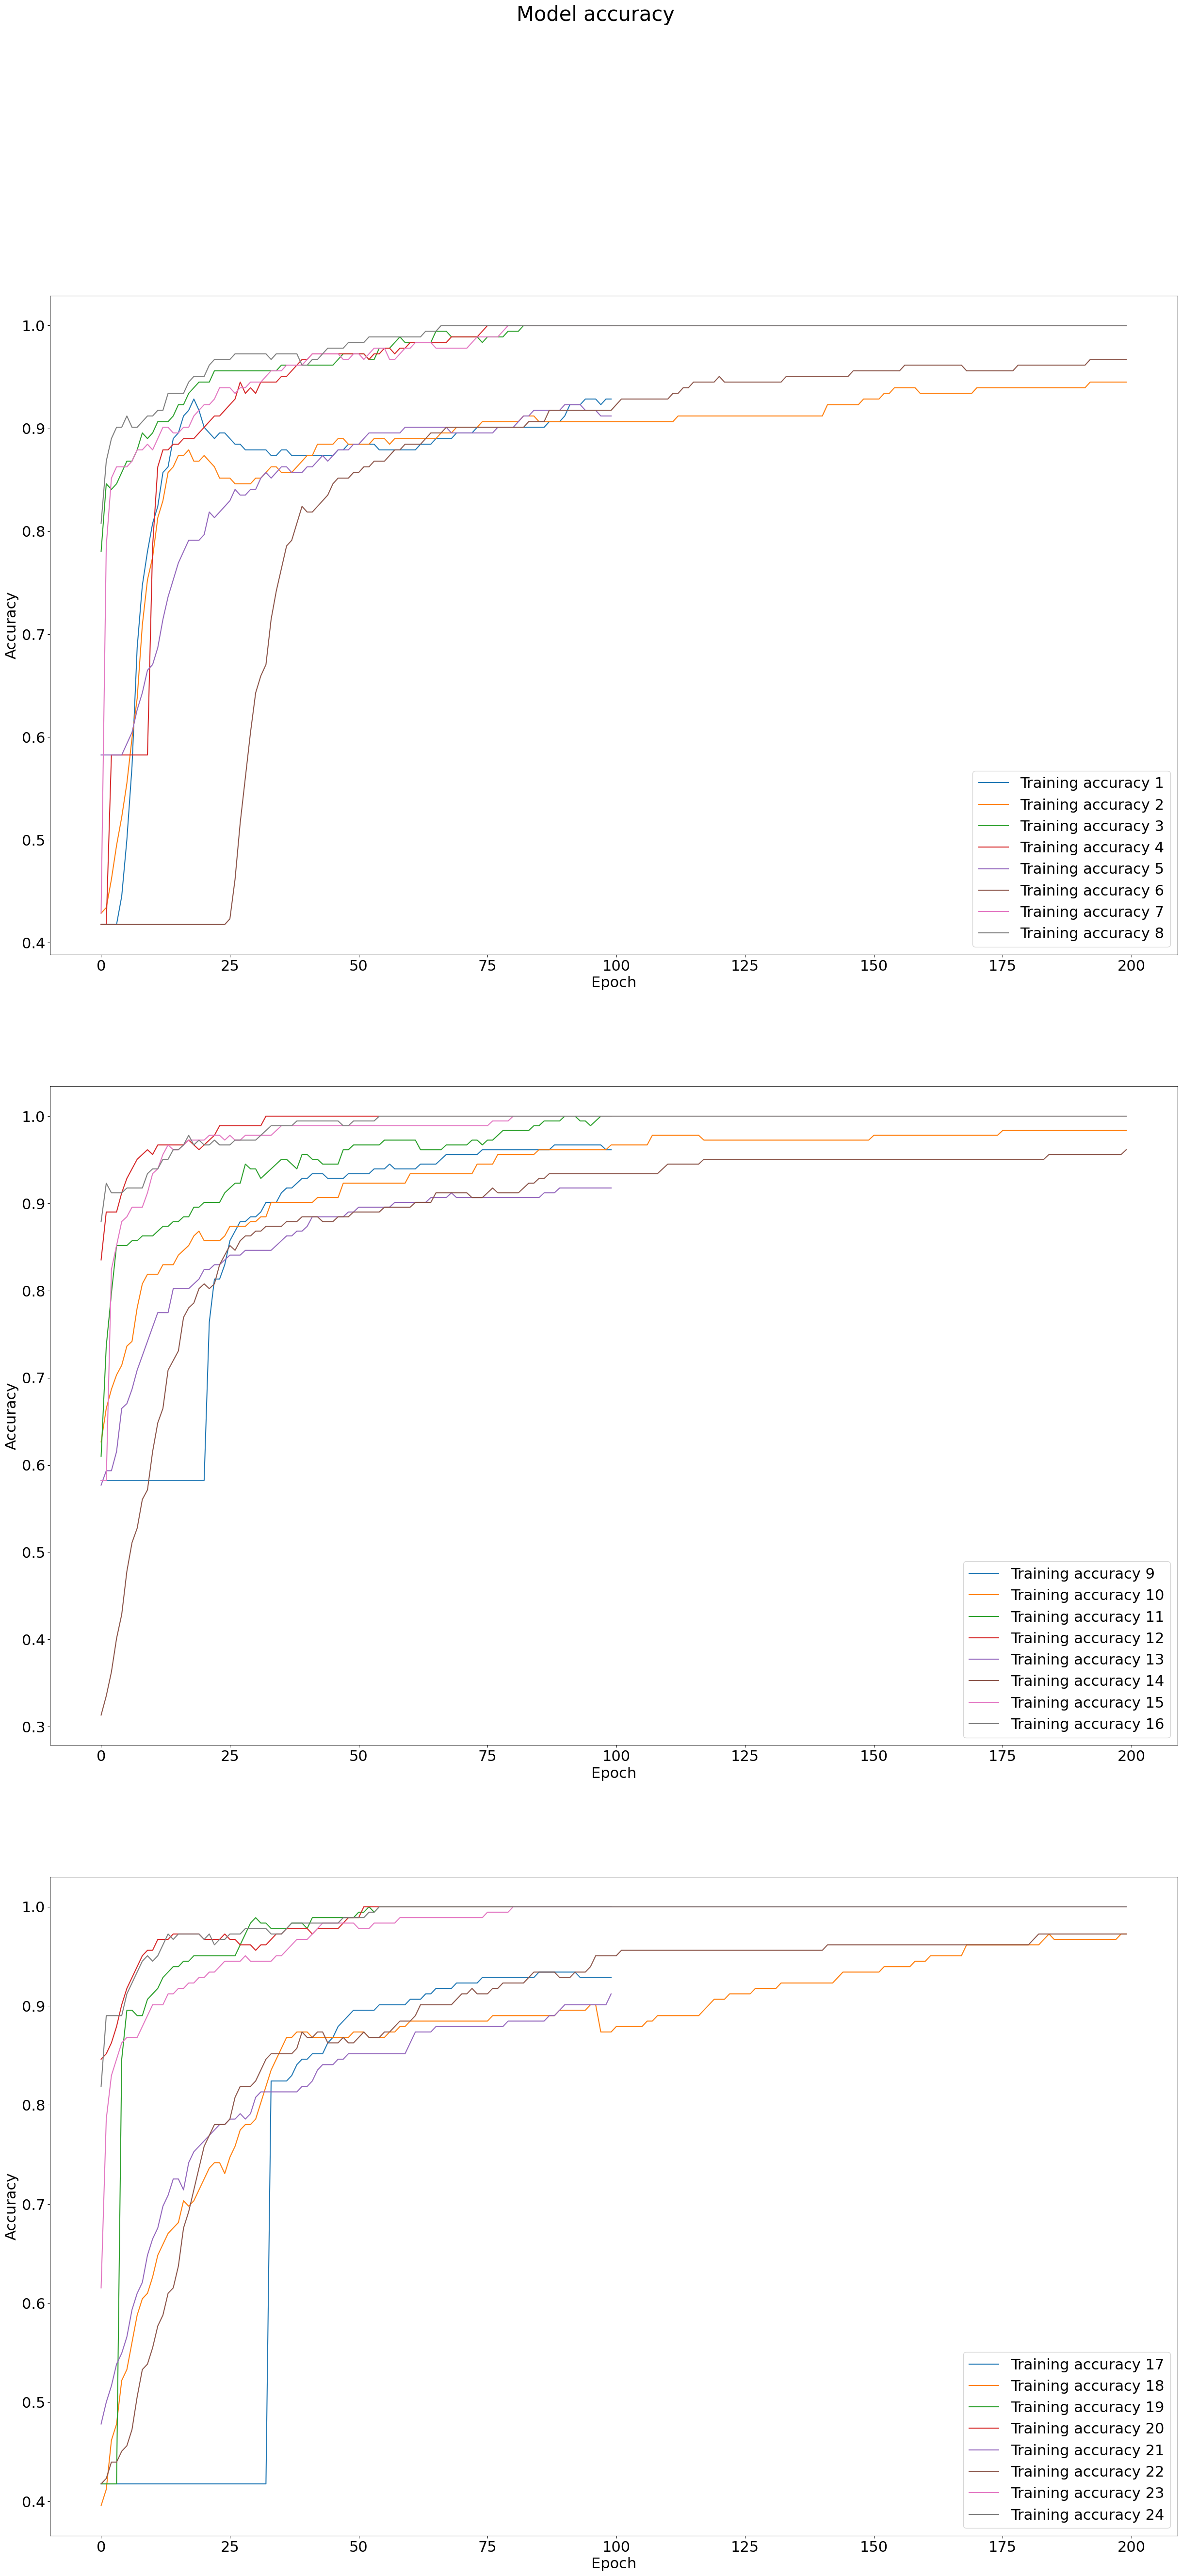

In [108]:

neural_network = NeuralNet("https://raw.githubusercontent.com/NorthPhoenix/ML-Artificial-Neural-Network/main/dataset/Algerian_forest_fires_dataset.csv")
description = neural_network.describe_dataset()
pdf = neural_network.preprocess()
_, results = neural_network.train_evaluate()

In [109]:
results = pd.DataFrame(results, columns=['Activation', 'Learning Rate', 'Max Iterations', 'Number of Hidden Layers', 'Training Accuracy', 'Test Accuracy', 'Training MSE', 'Test MSE'])
results.index = range(1, len(results)+1)

In [116]:
results.sort_values(by=['Test Accuracy'], ascending=False)

,Activation,Learning Rate,Max Iterations,Number of Hidden Layers,Training Accuracy,Test Accuracy,Training MSE,Test MSE
20,relu,0.10,200,2,1.000000,0.967213,0.000000,0.131148
3,logistic,0.10,100,2,1.000000,0.967213,0.000000,0.131148
4,logistic,0.10,200,2,1.000000,0.967213,0.000000,0.131148
23,relu,0.10,100,3,1.000000,0.967213,0.000000,0.131148
16,tanh,0.10,200,3,1.000000,0.967213,0.000000,0.131148
7,logistic,0.10,100,3,1.000000,0.967213,0.000000,0.131148
8,logistic,0.10,200,3,1.000000,0.967213,0.000000,0.131148
15,tanh,0.10,100,3,1.000000,0.967213,0.000000,0.131148
19,relu,0.10,100,2,1.000000,0.967213,0.000000,0.131148
21,relu,0.01,100,3,0.912088,0.967213,0.351648,0.131148
